In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import pickle

In [2]:
proyecto_data = pd.read_csv('../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv', delimiter=';')
proyecto_data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,NaN,1.62,64.0,no,no,2.0,NaN,no,no,2.0,yes,NaN,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,NaN,1.80,87.0,Frequently,no,3.0,NaN,no,no,2.0,no,NaN,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 2. Ingeniería de características:

a. Imputación de variables con data faltante:
  * Numérica

In [3]:
#Determinacion de nulos:
col_con_na = []
for col in proyecto_data.columns:
    porcentaje_faltante = proyecto_data[col].isnull().mean()
    if(porcentaje_faltante > 0):
        col_con_na.append(col)

col_con_na

['Age', 'Gender', 'Weight', 'FAVC', 'NCP', 'FAF', 'MTRANS']

In [4]:
#Proporcion de nulos:
proporcion_nulos = proyecto_data[col_con_na].isnull().mean()
proporcion_nulos

Age       0.050213
Gender    0.134060
Weight    0.050213
FAVC      0.028896
NCP       0.134060
FAF       0.134060
MTRANS    0.050213
dtype: float64

* Analisis CCA

In [5]:
#Extraer columnas numericas
cols_for_cca = [col for col in col_con_na if proyecto_data[col].dtype in ['float64']]
cols_for_cca

['Age', 'Weight', 'NCP', 'FAF']

In [6]:
#Imputacion por medio del CCA.
data_cca = proyecto_data[cols_for_cca].dropna()

In [7]:
data_cca.shape, proyecto_data.shape

((1742, 4), (2111, 17))

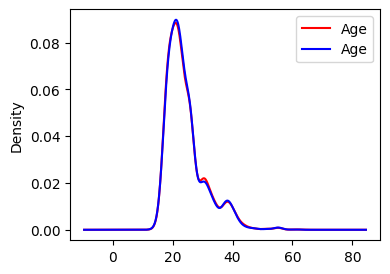

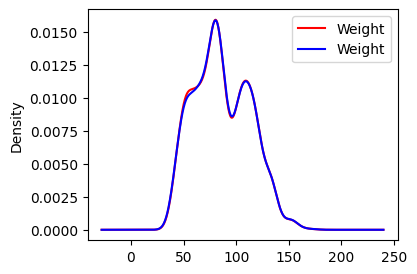

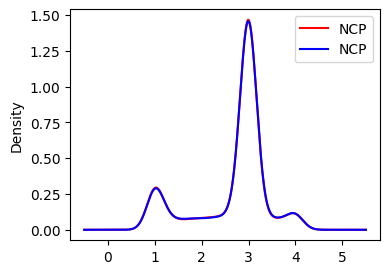

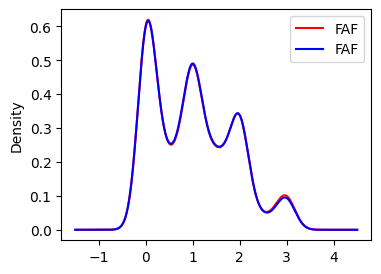

In [8]:
#Resultado de imputacion por CCA.

for col in cols_for_cca:
    fig = plt.figure(figsize=(4, 3))
    proyecto_data[col].plot.density(color='red', legend='Original')
    data_cca[col].plot.density(color='blue', legend='CCA')
    plt.show()

* Analisis Media

In [9]:
#Calculo para visualizar la media de cada columna numerica
medias = proyecto_data[cols_for_cca].mean()
medias

Age       24.342430
Weight    86.471125
NCP        2.684451
FAF        1.003579
dtype: float64

In [10]:
#Crear copia del dataset para imputacion de media
proyecto_data_media = proyecto_data.copy()
proyecto_data_media.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,NaN,1.62,64.0,no,no,2.0,NaN,no,no,2.0,yes,NaN,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,NaN,1.80,87.0,Frequently,no,3.0,NaN,no,no,2.0,no,NaN,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
#Imputacion de la media en las columnas numericas
for col in cols_for_cca:
    media_columna = proyecto_data_media[col].mean()
    proyecto_data_media[col] = proyecto_data_media[col].fillna(media_columna)

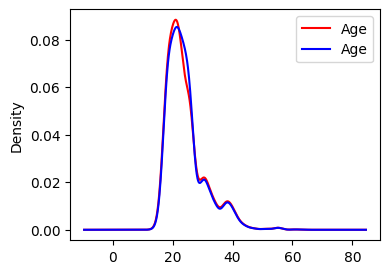

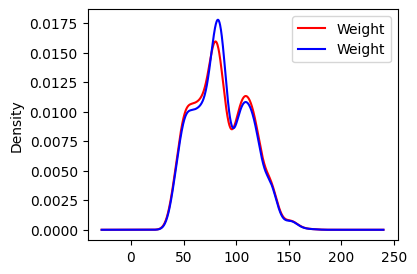

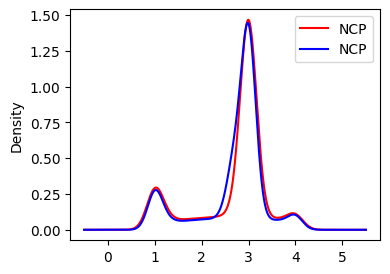

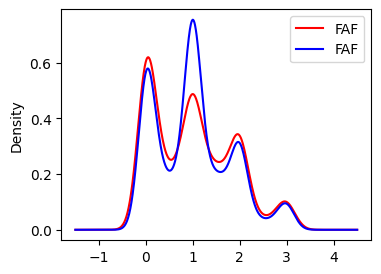

In [12]:
#Resultados de la imputación
for col in cols_for_cca:
    fig = plt.figure(figsize=(4, 3))
    proyecto_data[col].plot.density(color='red', legend='Original')
    proyecto_data_media[col].plot.density(color='blue', legend='Media')
    plt.show()

* Analisis Mediana

In [13]:
#Calculo de la mediana por cada columna numerica con datos nulos
medianas = proyecto_data[cols_for_cca].median()
medianas

Age       22.804818
Weight    82.636162
NCP        3.000000
FAF        1.000000
dtype: float64

In [14]:
proyecto_data_mediana = proyecto_data.copy()
proyecto_data_mediana.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,NaN,1.62,64.0,no,no,2.0,NaN,no,no,2.0,yes,NaN,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,NaN,1.80,87.0,Frequently,no,3.0,NaN,no,no,2.0,no,NaN,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [15]:
#Imputacion de la media en las columnas numericas
for col in cols_for_cca:
    mediana_columna = proyecto_data_mediana[col].median()
    proyecto_data_mediana[col] = proyecto_data_mediana[col].fillna(mediana_columna)

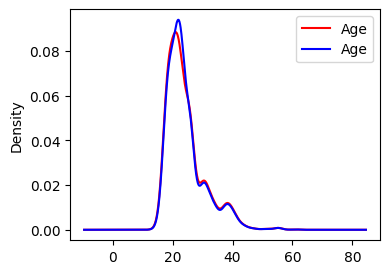

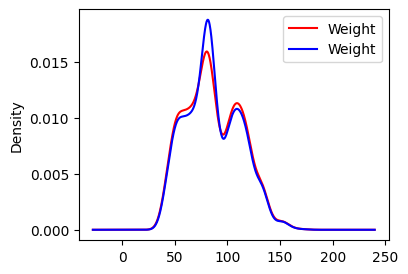

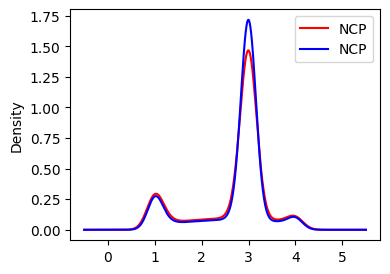

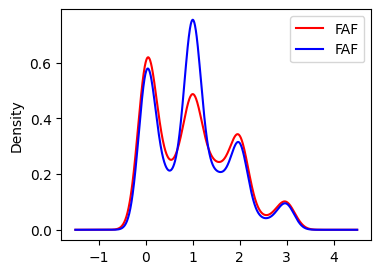

In [16]:
for col in cols_for_cca:
    fig = plt.figure(figsize=(4, 3))
    proyecto_data[col].plot.density(color='red', legend='Original')
    proyecto_data_mediana[col].plot.density(color='blue', legend='Media')
    plt.show()

R// Al realizar un analisis de los metodos de imputacion anterior para variables numericas, el mejor metodo es la de la media al tener levemente un mejor ajuste con relacion a la data original.

a. Imputación de variables con data faltante:
  * Categoricas

In [17]:
#Extraer variables categoricas con nulos.
categoricas = [col for col in col_con_na if proyecto_data_media[col].dtype == 'object']
categoricas

['Gender', 'FAVC', 'MTRANS']

In [18]:
#Analisis para la variable Gender.
proyecto_data_media['Gender'].value_counts(normalize=True).head(5)

Gender
Male      0.501094
Female    0.498906
Name: proportion, dtype: float64

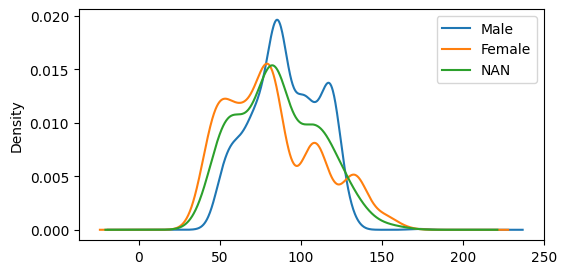

In [19]:
#Analisis por medio de grafica
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
proyecto_data_media[proyecto_data_media['Gender'] == 'Male' ]['Weight'].plot(kind='kde', ax=ax, label='Male')
proyecto_data_media[proyecto_data_media['Gender'] == 'Female' ]['Weight'].plot(kind='kde', ax=ax, label='Female')
proyecto_data_media[proyecto_data_media['Gender'].isnull()]['Weight'].plot(kind='kde', ax=ax, label='NAN')
plt.legend()
plt.show()

#Dado el resultado se considera adecuado imputar con una categoria de Missing

In [20]:
#Imputacion de la variable Gender con una nueva categoria 'Missing'.
proyecto_data_media['Gender'].fillna('Missing', inplace=True)

/var/folders/5k/f74s8p_s2gv7prsj015p5f_m0000gn/T/ipykernel_1775/2939654022.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  proyecto_data_media['Gender'].fillna('Missing', inplace=True)


In [21]:
#Analisis para la variable FAVC.
proyecto_data_media['FAVC'].value_counts(normalize=True).head(5)

FAVC
yes    0.883902
no     0.116098
Name: proportion, dtype: float64

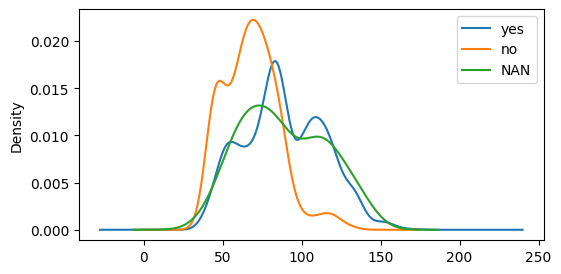

In [22]:
#Analisis por medio de grafica
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
proyecto_data_media[proyecto_data_media['FAVC'] == 'yes' ]['Weight'].plot(kind='kde', ax=ax, label='yes')
proyecto_data_media[proyecto_data_media['FAVC'] == 'no' ]['Weight'].plot(kind='kde', ax=ax, label='no')
proyecto_data_media[proyecto_data_media['FAVC'].isnull()]['Weight'].plot(kind='kde', ax=ax, label='NAN')
plt.legend()
plt.show()

#Dado el resultado se considera adecuado imputar con la categoria de yes

In [23]:
#Imputacion de la variable FAVC con 'yes'.
proyecto_data_media['FAVC'].fillna('yes', inplace=True)

/var/folders/5k/f74s8p_s2gv7prsj015p5f_m0000gn/T/ipykernel_1775/2430758946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  proyecto_data_media['FAVC'].fillna('yes', inplace=True)


In [24]:
#Analisis para la variable FAVC.
proyecto_data_media['MTRANS'].value_counts(normalize=True)

MTRANS
Public_Transportation    0.745636
Automobile               0.217955
Walking                  0.027431
Motorbike                0.005486
Bike                     0.003491
Name: proportion, dtype: float64

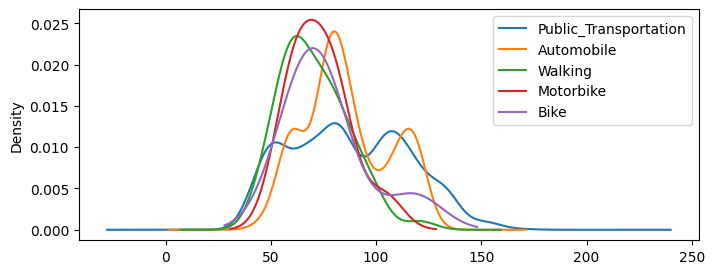

In [25]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Public_Transportation' ]['Weight'].plot(kind='kde', ax=ax, label='Public_Transportation')
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Automobile' ]['Weight'].plot(kind='kde', ax=ax, label='Automobile')
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Walking' ]['Weight'].plot(kind='kde', ax=ax, label='Walking')
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Motorbike' ]['Weight'].plot(kind='kde', ax=ax, label='Motorbike')
proyecto_data_media[proyecto_data_media['MTRANS'] == 'Bike' ]['Weight'].plot(kind='kde', ax=ax, label='Bike')
plt.legend()
plt.show()

#Dado el resultado se considera adecuado imputar con una categoria de missing

In [26]:
#Imputacion de la variable MTRANS con una nueva categoria 'Missing'.
proyecto_data_media['MTRANS'].fillna('Missing', inplace=True)

/var/folders/5k/f74s8p_s2gv7prsj015p5f_m0000gn/T/ipykernel_1775/2503917979.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  proyecto_data_media['MTRANS'].fillna('Missing', inplace=True)


b. Codificación de variables categóricas

In [27]:
#Determinar las columnas categóricas
cols_for_cod = [col for col in proyecto_data_media.columns if proyecto_data_media[col].dtype in ['object']]
cols_for_cod

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

In [28]:
#Leyenda de categorias antes de codificar sobre las variables categoricas
for col in cols_for_cod:
    leyenda = proyecto_data_media[col].value_counts()
    print(leyenda)

Gender
Male       916
Female     912
Missing    283
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
FAVC
yes    1873
no      238
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
MTRANS
Public_Transportation    1495
Automobile                437
Missing                   106
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [29]:
#Para efectos del proyecto se utilizara la codificación por frecuencia

#Función para determinar la frecuencia de la variable categórica
def frequency_enconding_procedure(data_serie):
    freq_dict = data_serie.value_counts(ascending=False).to_dict()
    return data_serie.map(freq_dict)

In [30]:
#bucle para codificar las variables categóricas y reemplazar los datos en el dataset
for col in cols_for_cod:
    proyecto_data_media[col] = frequency_enconding_procedure(proyecto_data_media[col])

In [31]:
#Resultado de la codificacion por medio de la frecuencia:
proyecto_data_media.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,283,1.62,64.0,639,238,2.0,2.684451,2015,2067,2.0,1726,1.003579,1.0,1765,1495,287
1,21.0,912,1.52,56.0,1401,238,3.0,3.000000,96,44,3.0,1726,3.000000,0.0,1765,1495,287
2,23.0,916,1.80,77.0,70,238,2.0,3.000000,2015,2067,2.0,1726,2.000000,1.0,1765,1495,287
3,27.0,283,1.80,87.0,70,238,3.0,2.684451,2015,2067,2.0,385,1.003579,0.0,1765,55,290
4,22.0,916,1.78,89.8,1401,238,2.0,1.000000,2015,2067,2.0,385,0.000000,0.0,1765,1495,290


c. Tratamiento de Outliers

In [32]:
import scipy.stats as stats

In [33]:
#Función para identificar las variables continuas, discretas y categoricas
def get_variables_scale(dataset):
    categoricas = [col for col in dataset.columns if dataset[col].dtype == 'object']
    continuas = [col for col in dataset.columns if dataset[col].dtype in ['float64','int64'] and len(dataset[col].unique()) > 30]
    discretas = [col for col in dataset.columns if dataset[col].dtype in ['float64','int64'] and len(dataset[col].unique()) <= 30]
    return categoricas, continuas, discretas

In [34]:
cat, cont, disct = get_variables_scale(proyecto_data_media)

In [35]:
cont

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [36]:
#Visualizacion de las columnas antes del tratamiento de outliers
def plot_outliers_analysis(dataset, col):
    plt.figure(figsize=(20,6))

    print(col)
    plt.subplot(131)
    sns.histplot(dataset[col], bins=30)
    plt.title("Densidad - Histograma")

    plt.subplot(132)
    stats.probplot(dataset[col], dist="norm", plot=plt)
    plt.title("QQ-Plot")

    plt.subplot(133)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.show()

Age


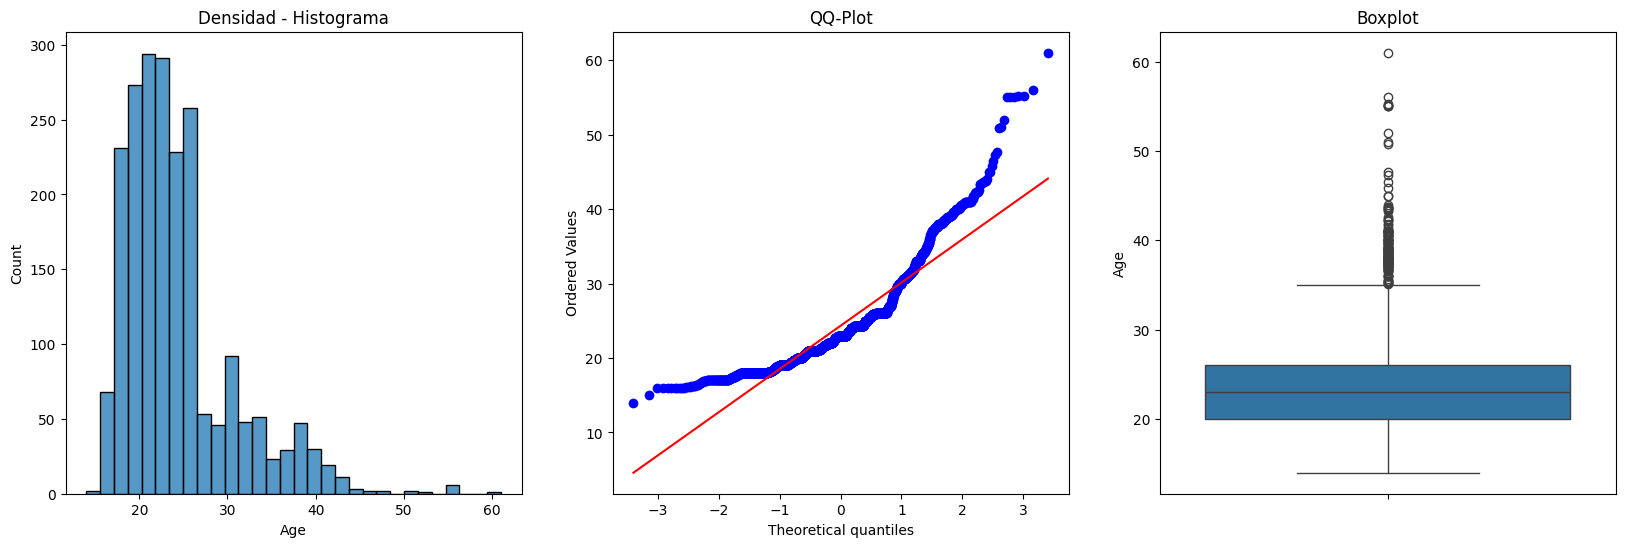

Height


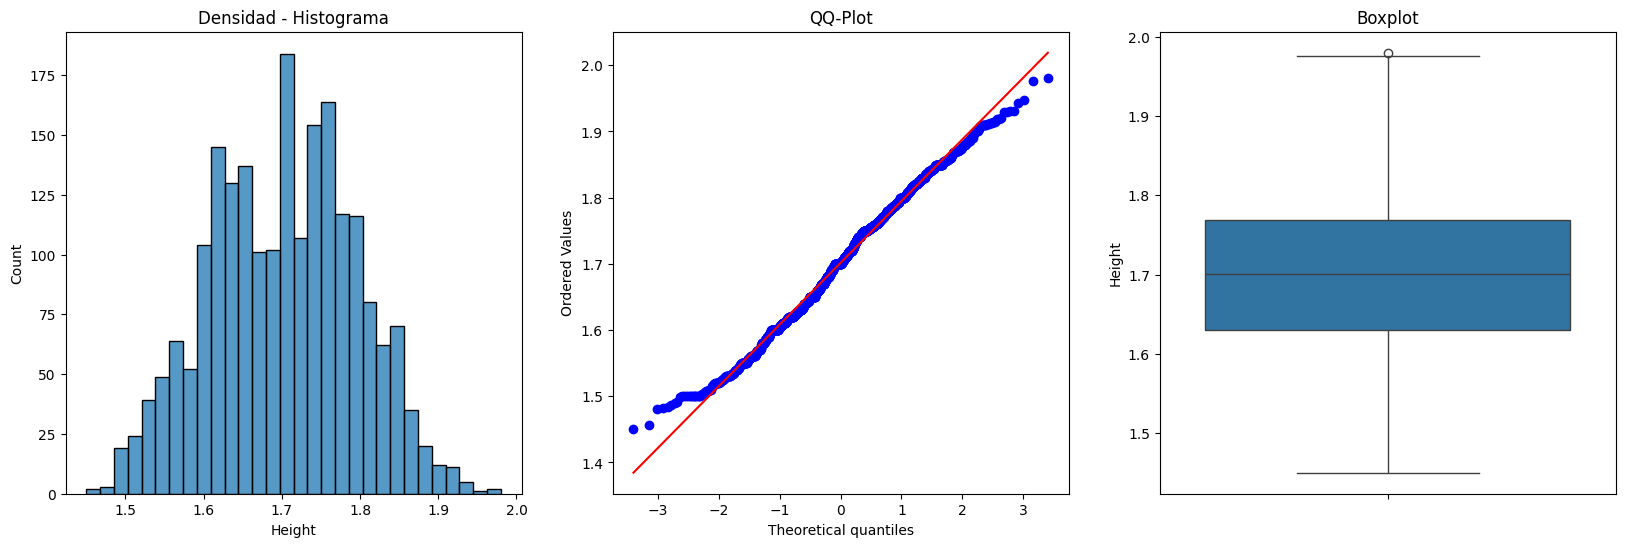

Weight


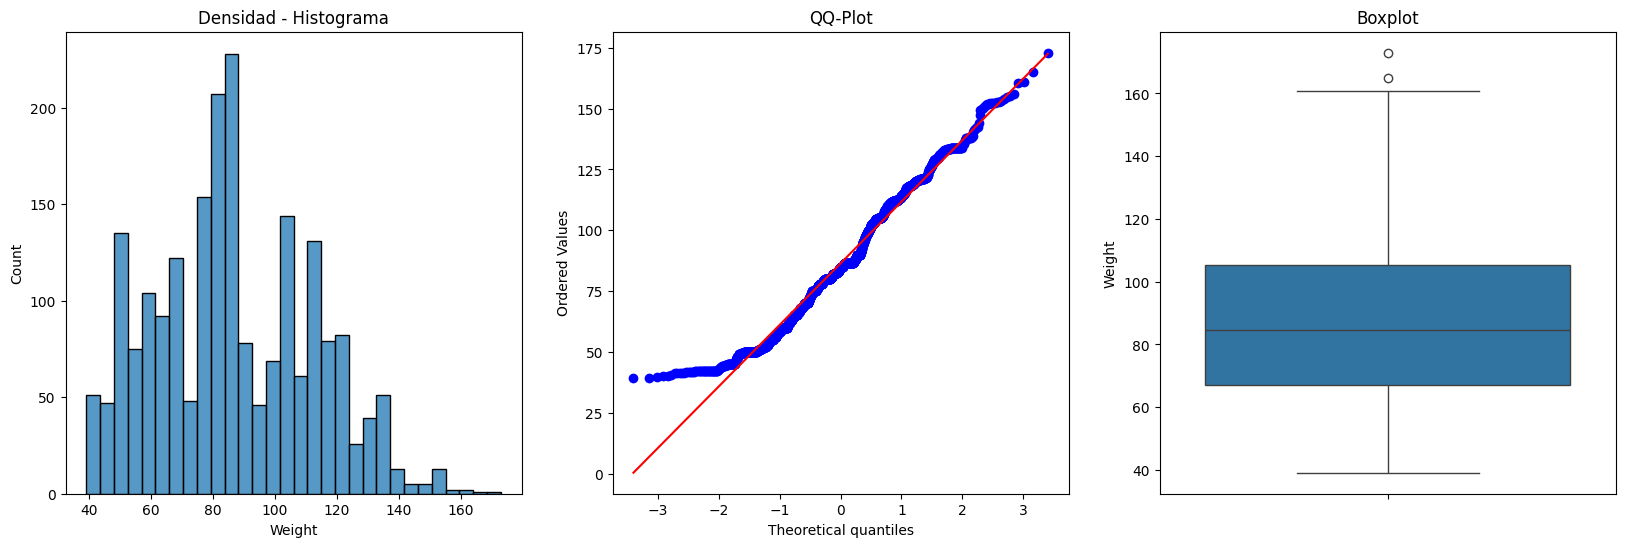

FCVC


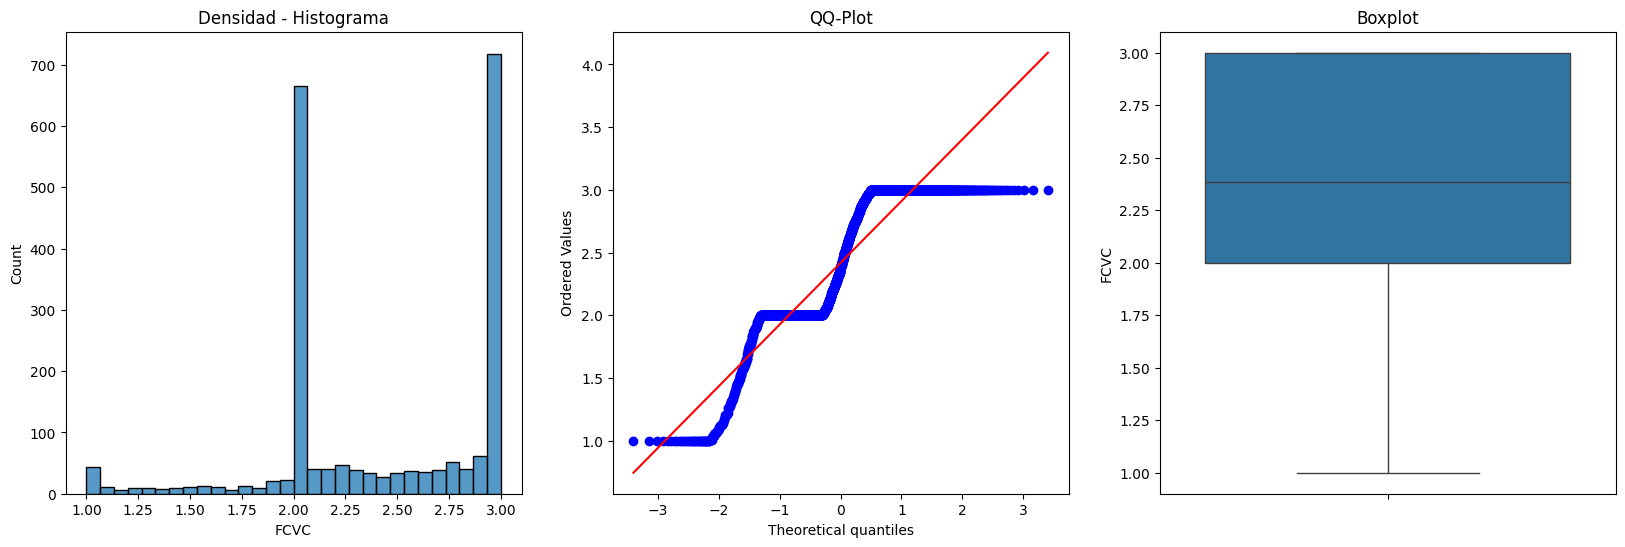

NCP


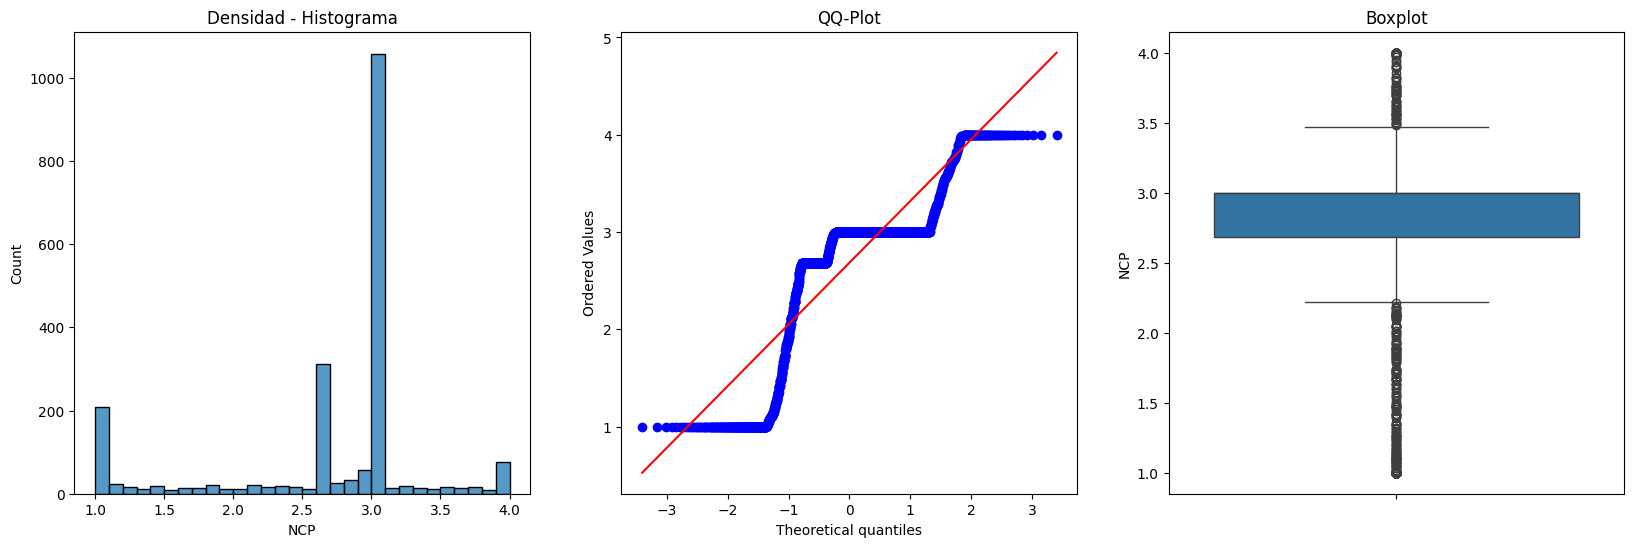

CH2O


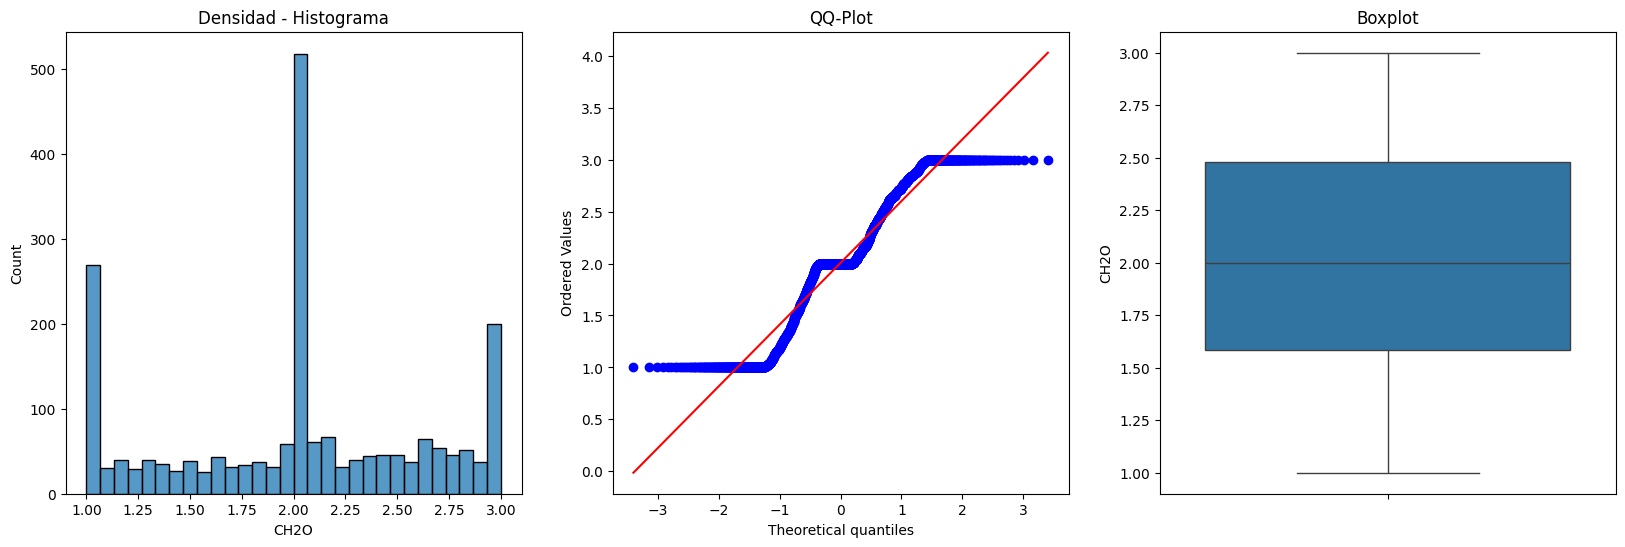

FAF


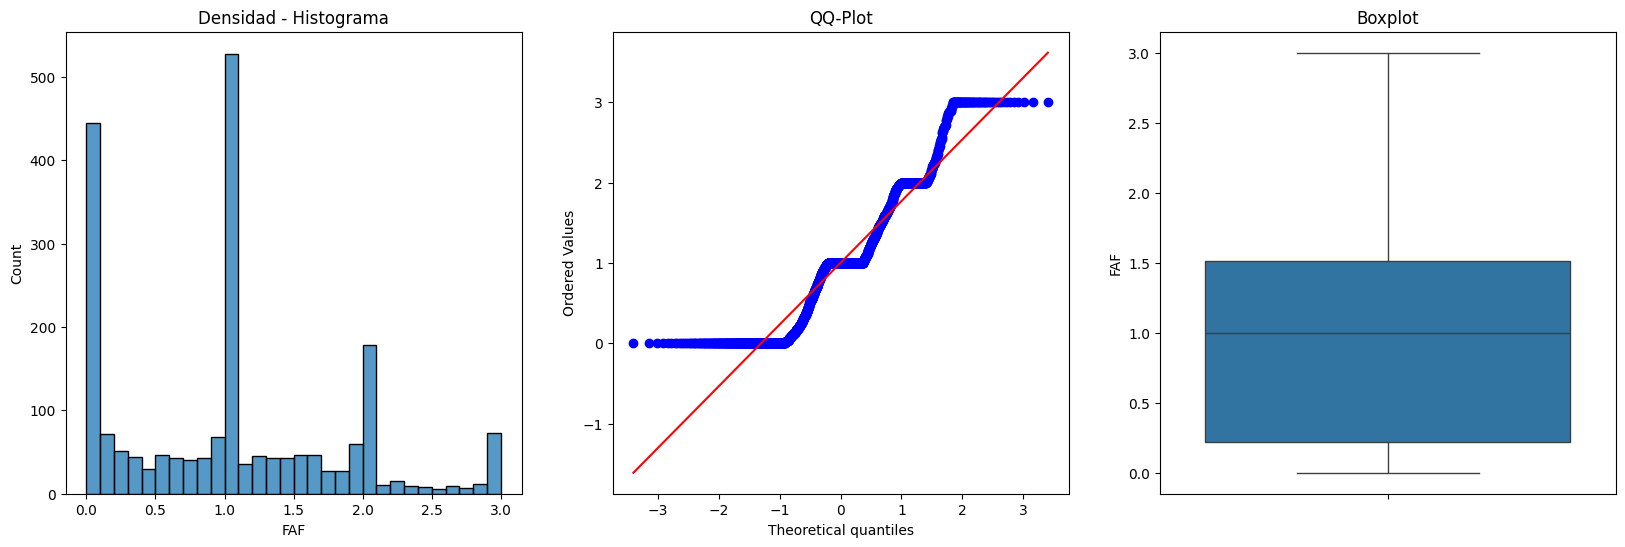

TUE


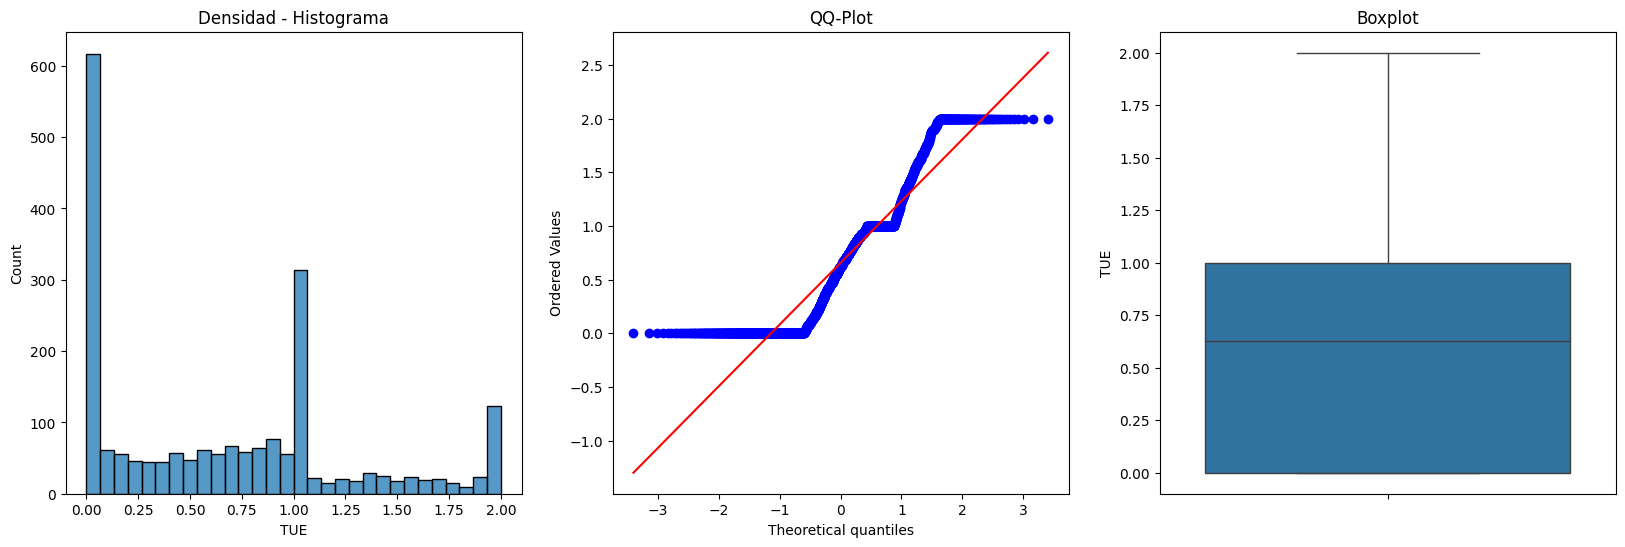

In [37]:
for col in cont:
    plot_outliers_analysis(proyecto_data_media, col)

In [38]:
#Tratamiento de Outliers con el metodo Capping
proyecto_data_cap = proyecto_data_media.copy()

In [39]:
#Obtener limite superior e inferior
def get_outliers_limits(dataset,col):
    IQR = proyecto_data_cap[col].quantile(0.75) - proyecto_data_cap[col].quantile(0.25)
    LI = proyecto_data_cap[col].quantile(0.25) - (1.5*IQR)
    LS = proyecto_data_cap[col].quantile(0.75) + (1.5*IQR)
    return LI, LS

In [40]:
for col in cont:
    LI, LS = get_outliers_limits(proyecto_data_cap, col)

    proyecto_data_cap[col] = np.where(proyecto_data_cap[col] > LS, LS, 
         np.where(proyecto_data_cap[col] < LI, LI, 
         proyecto_data_cap[col]))

Age


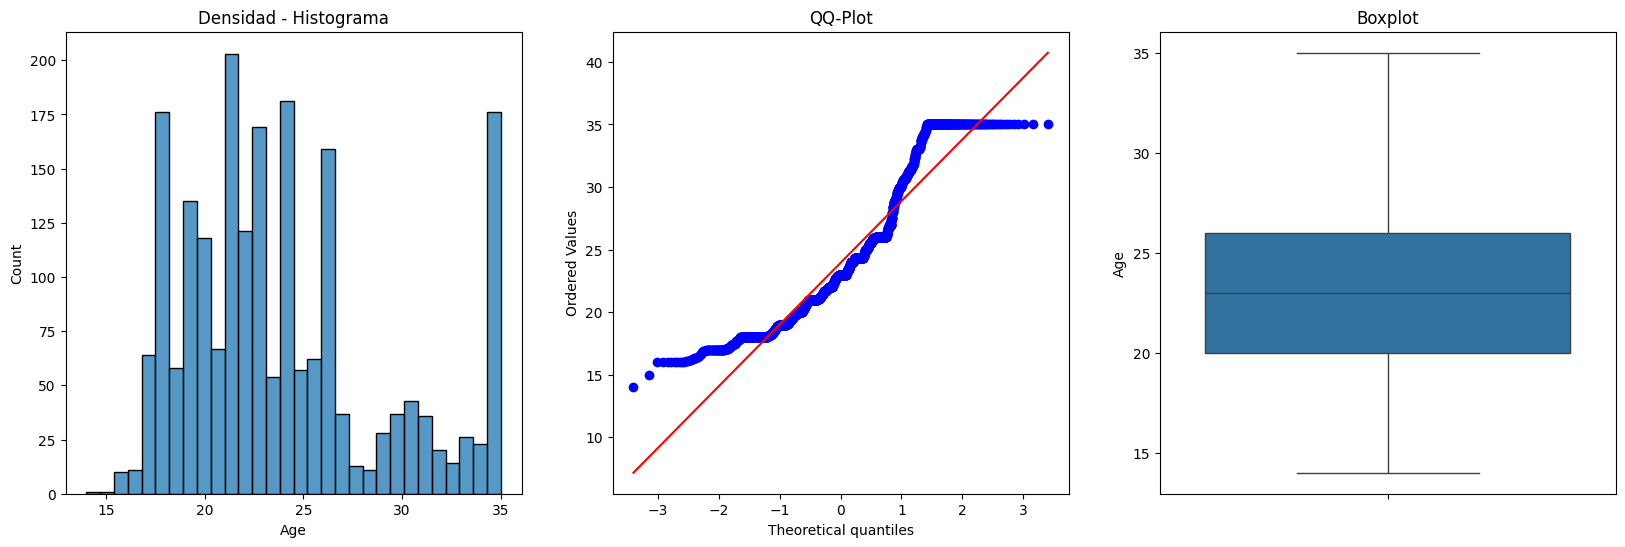

Height


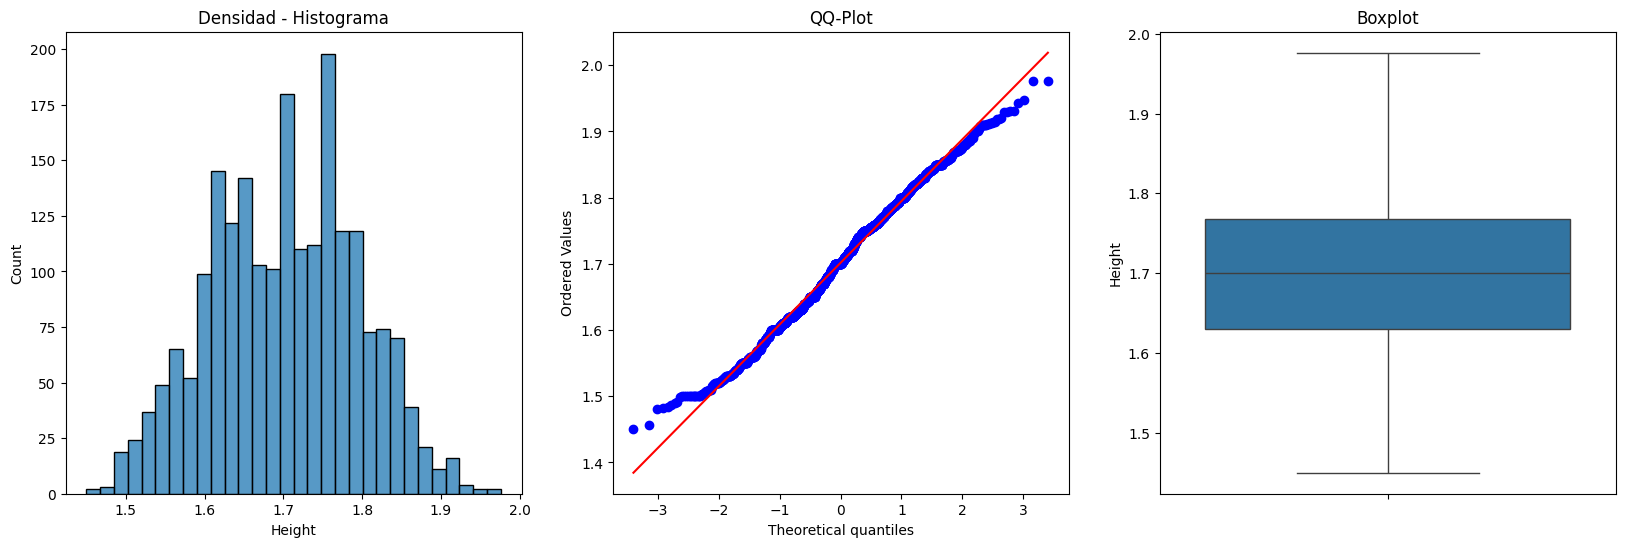

Weight


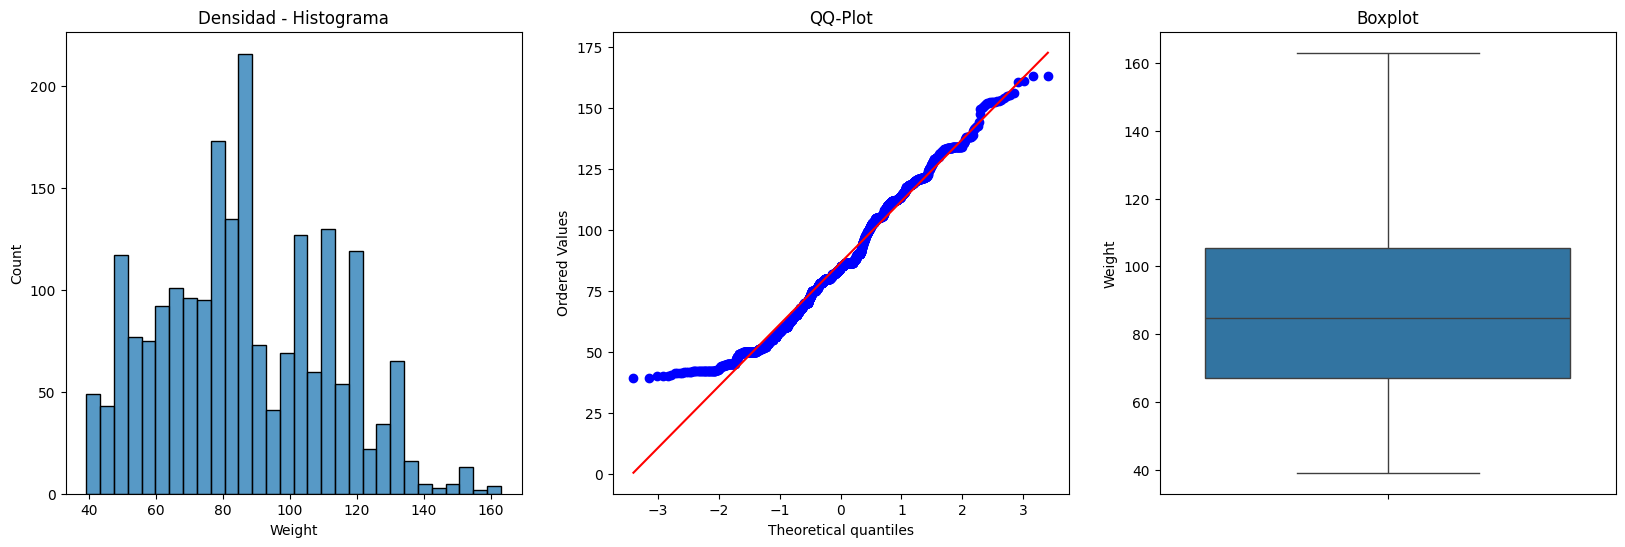

FCVC


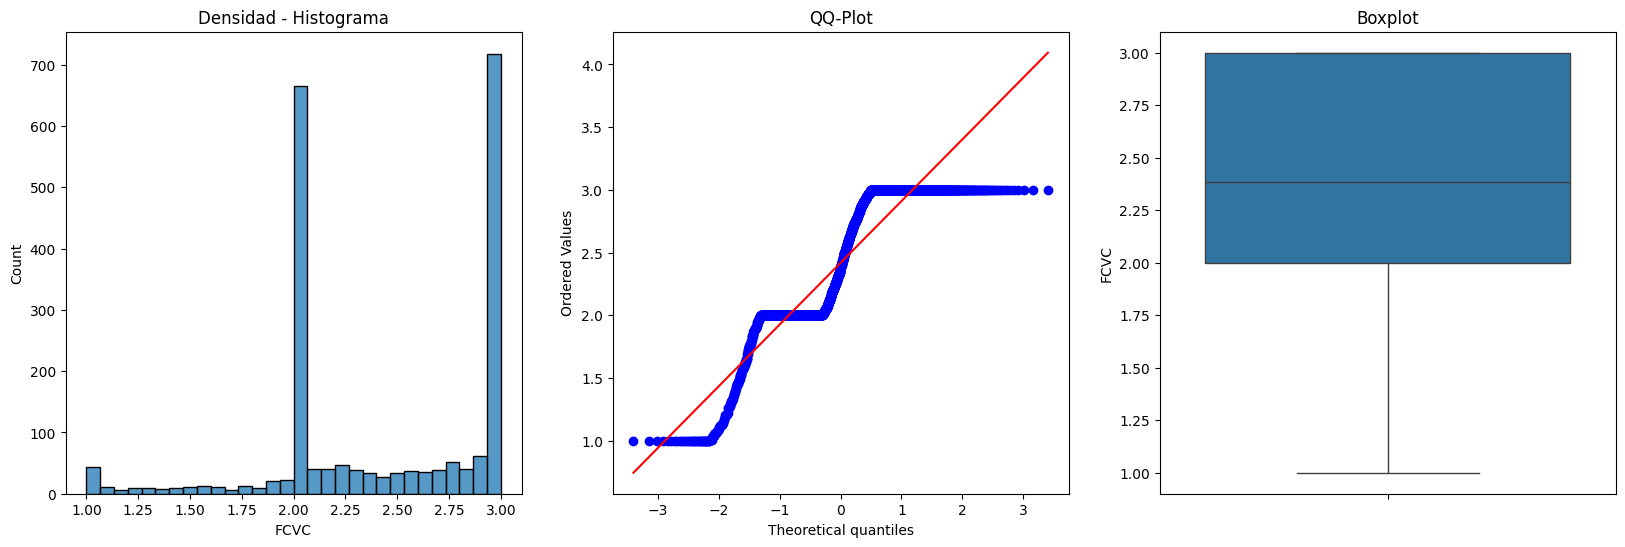

NCP


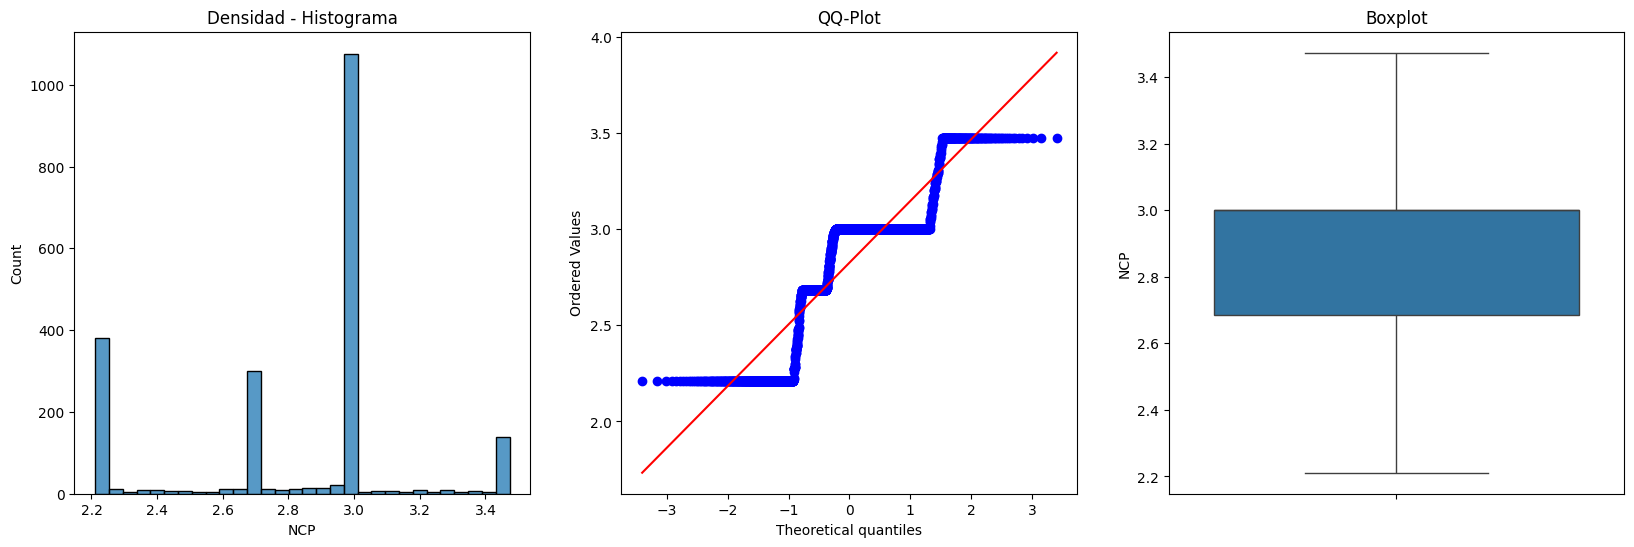

CH2O


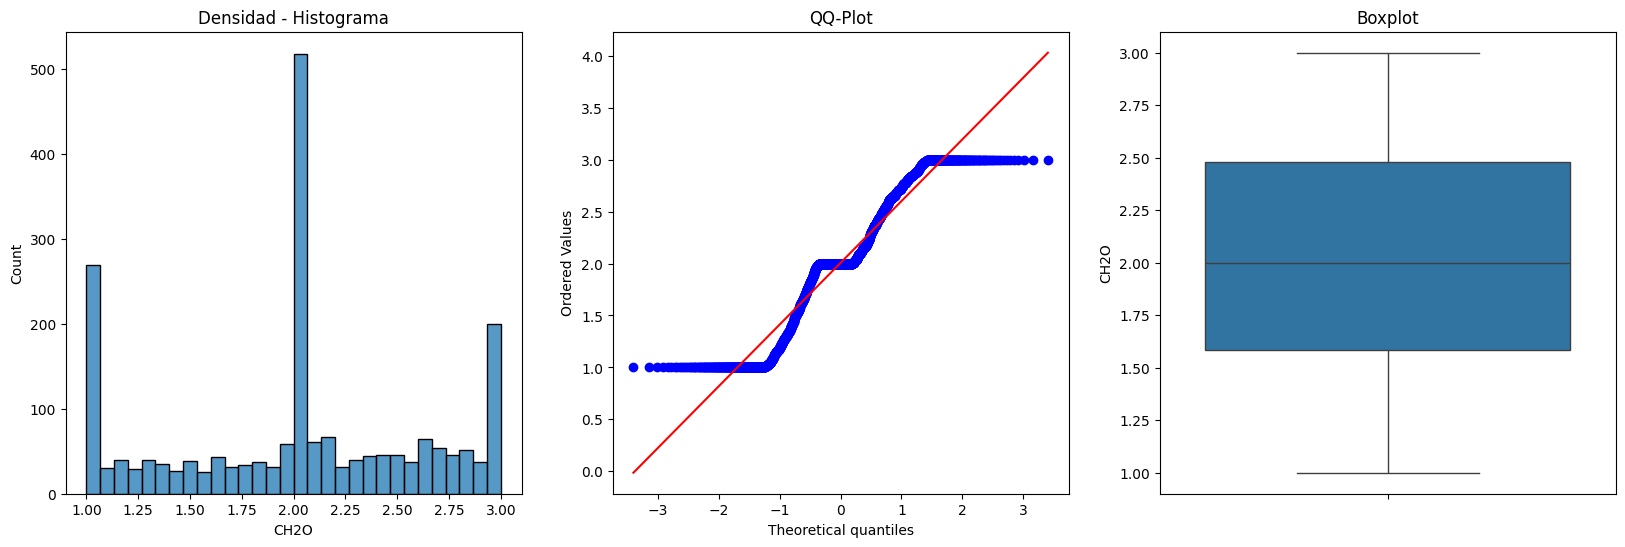

FAF


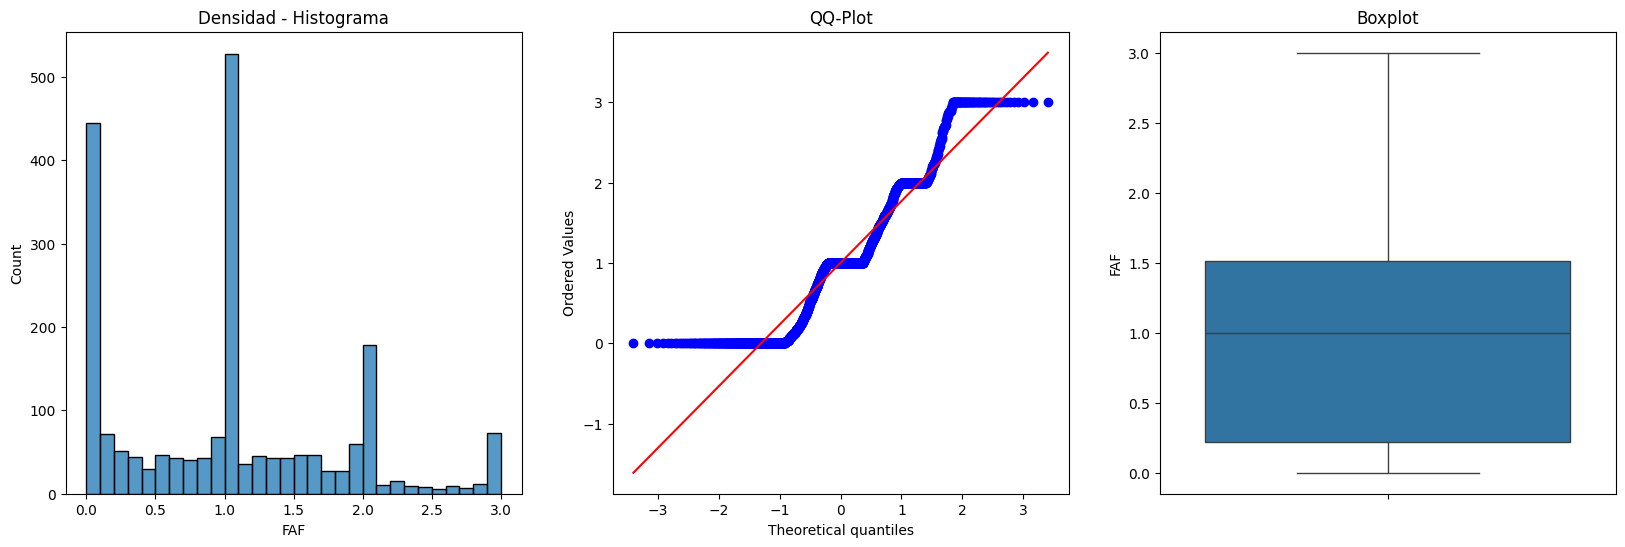

TUE


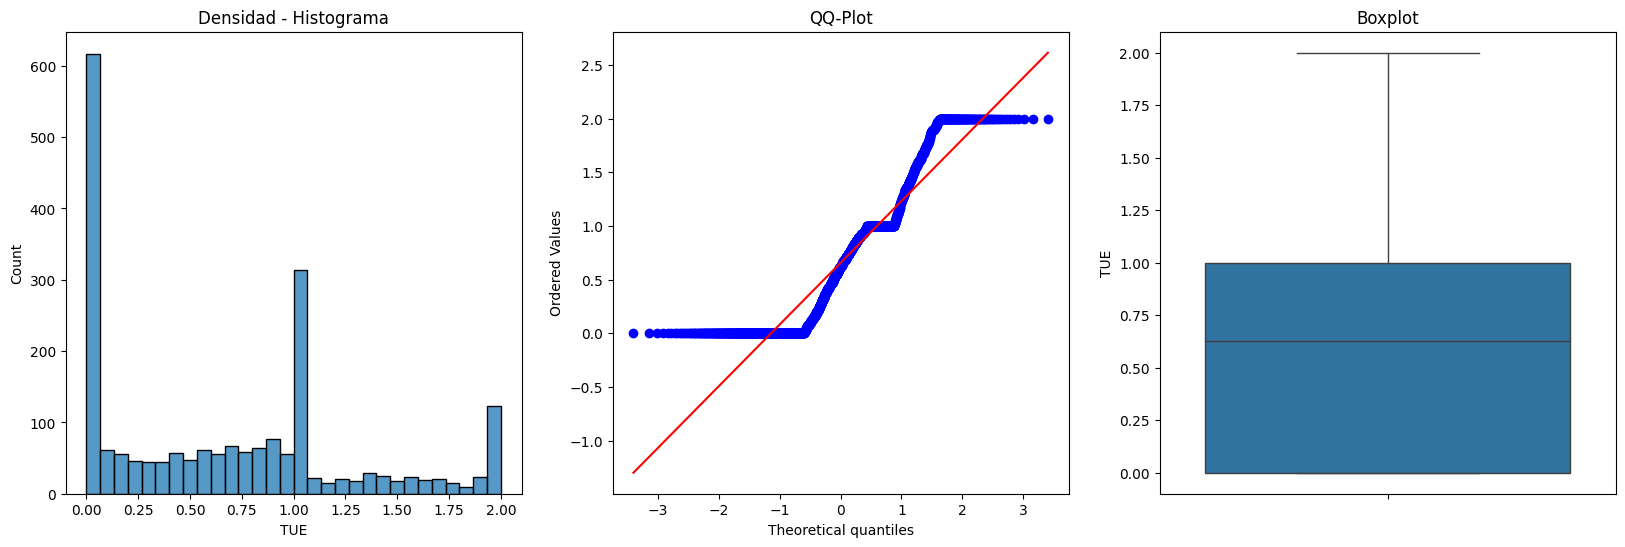

In [41]:
for col in cont:
    plot_outliers_analysis(proyecto_data_cap, col)

d. Transformación de variables numéricas

In [42]:
#Funcion para visualizar la distribucion de las variables categoricas
def plot_density_qq(df, variable):
    plt.figure(figsize = (8, 3))
    plt. subplot(121)
    df[variable].hist(bins = 30)
    plt.title(variable)

    plt.subplot(122)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.show()


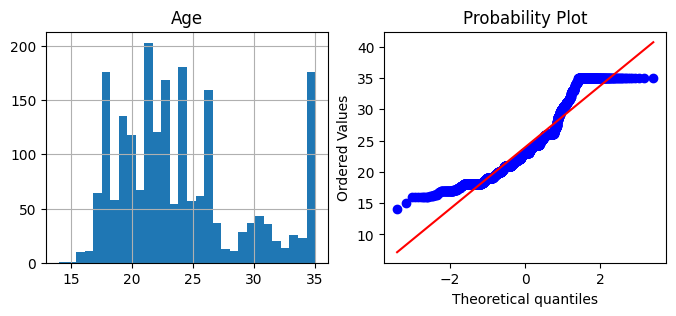

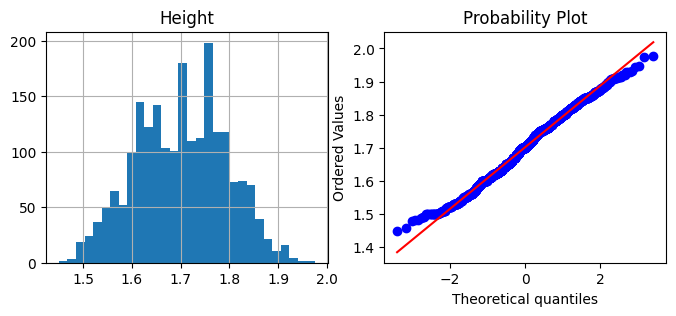

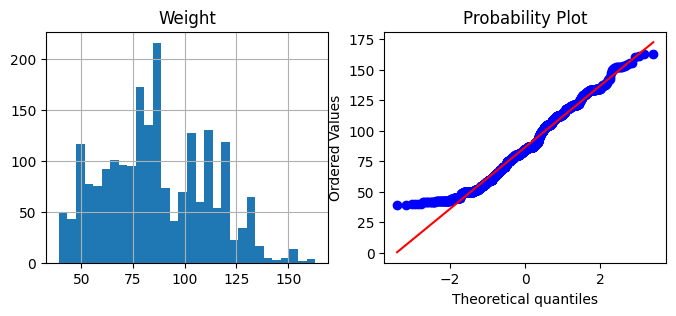

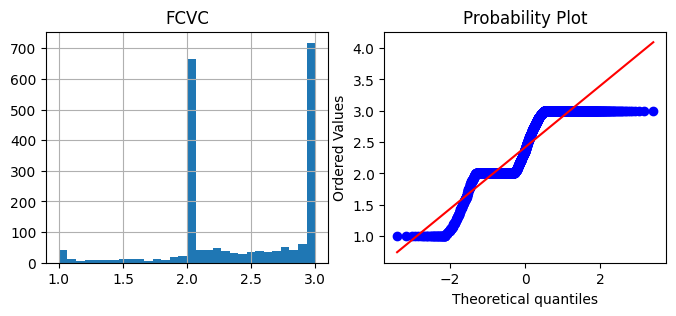

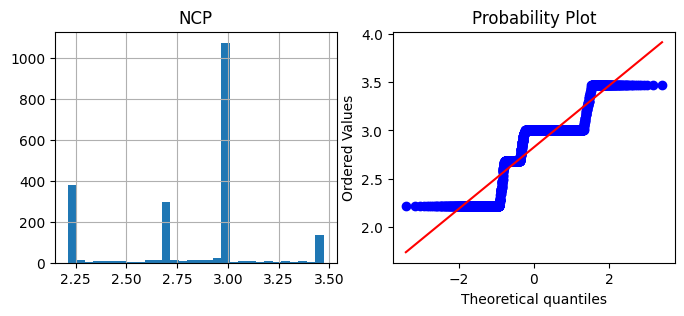

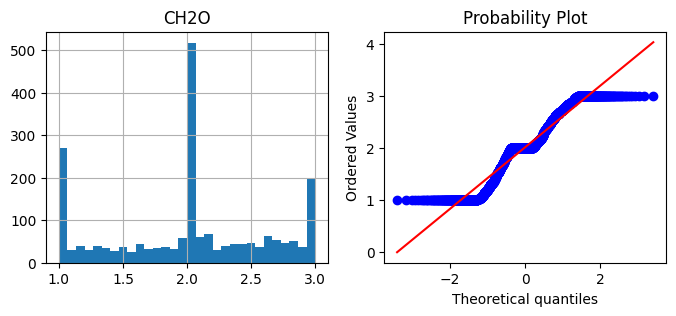

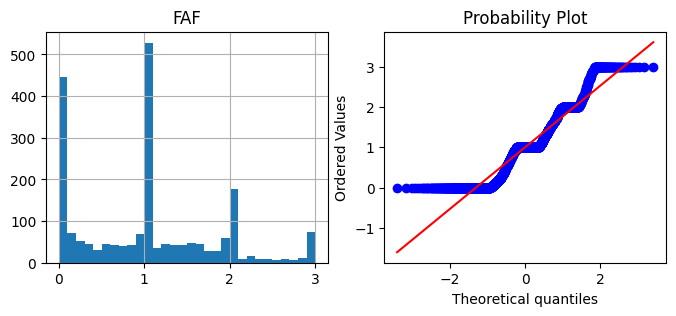

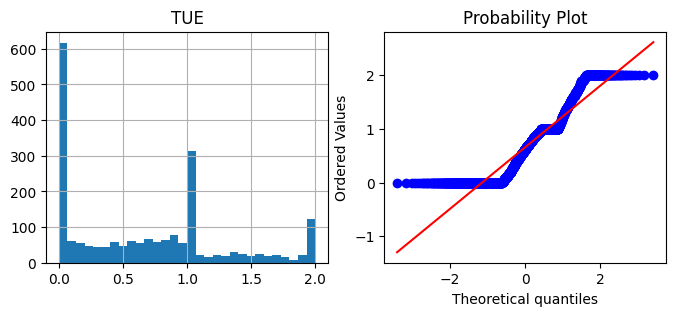

In [43]:
for col in cont:
    plot_density_qq(proyecto_data_cap, col)

- Transformacion Logaritmica

In [44]:
proyecto_data_log = proyecto_data_cap.copy()

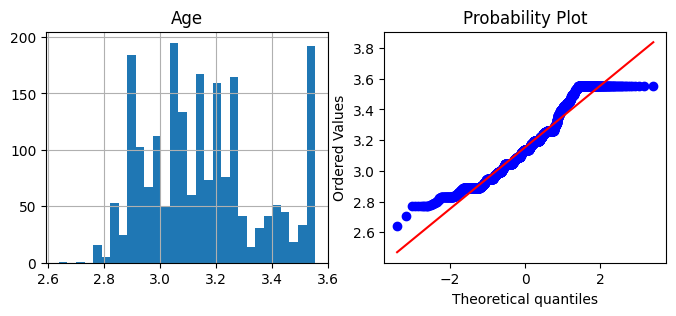

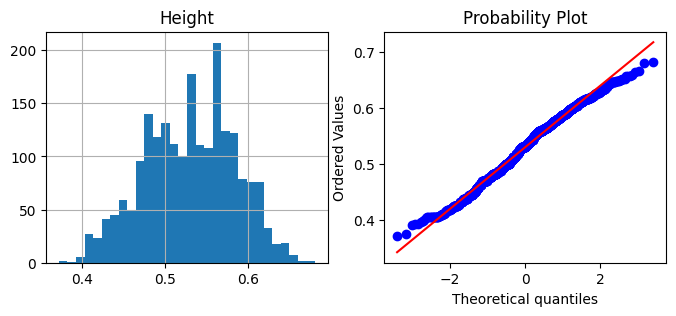

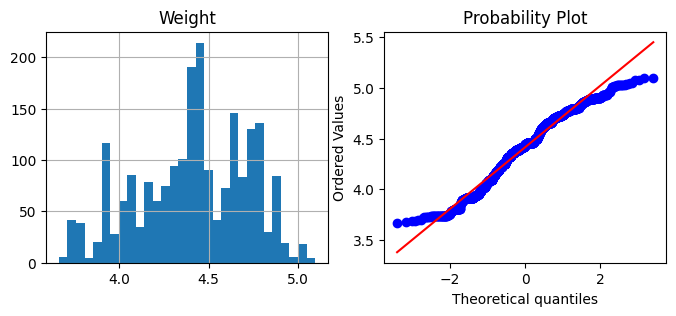

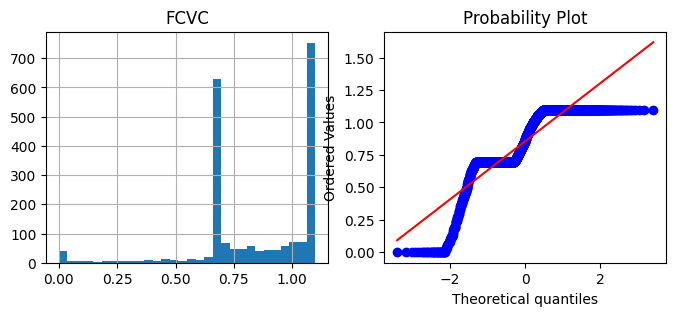

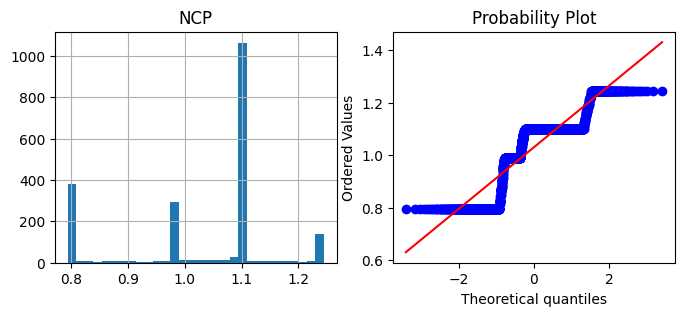

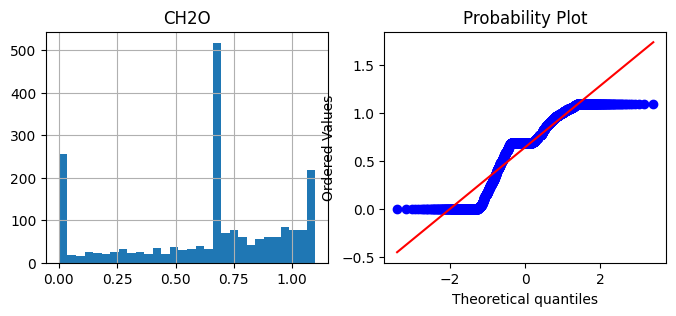

Advertencia: La columna 'FAF' contiene valores <= 0. Saltando transformación logarítmica para esta columna.
Advertencia: La columna 'TUE' contiene valores <= 0. Saltando transformación logarítmica para esta columna.


In [45]:
for col in cont:
    if col in proyecto_data_log.columns:
        if (proyecto_data_log[col] <= 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores <= 0. Saltando transformación logarítmica para esta columna.")
            continue
        proyecto_data_log[col] = np.log(proyecto_data_log[col])
        plot_density_qq(proyecto_data_log, col)
        plt.show()

- Transformacion Polinomial

In [46]:
proyecto_data_poli = proyecto_data_cap.copy()

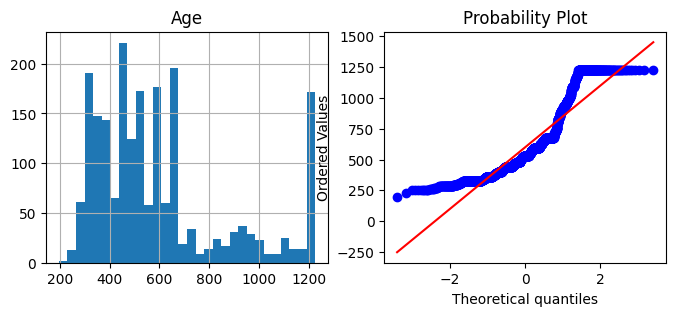

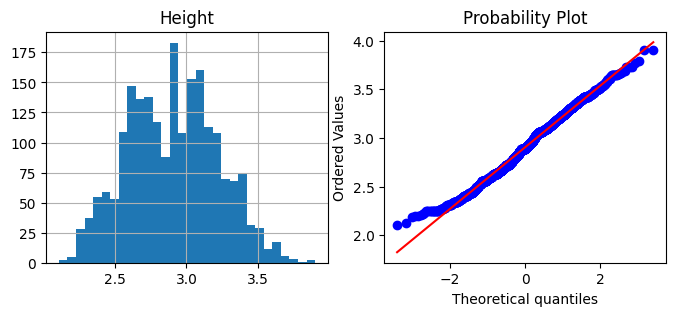

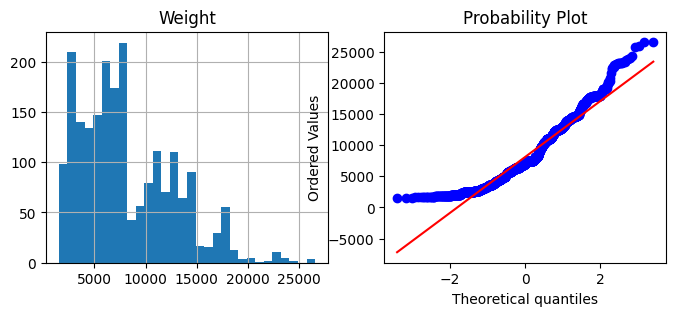

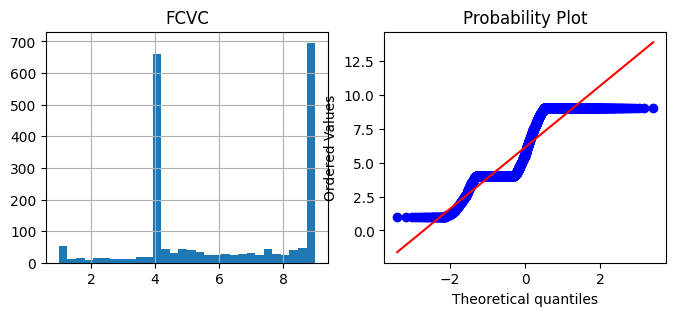

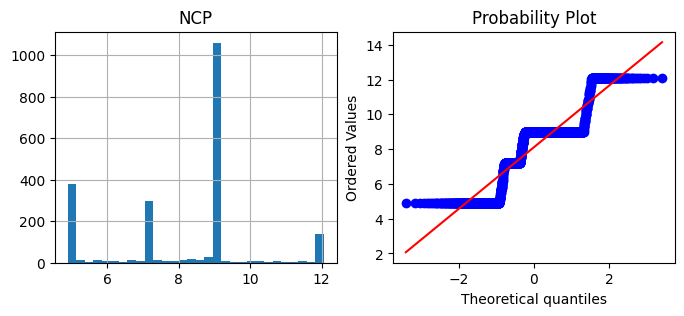

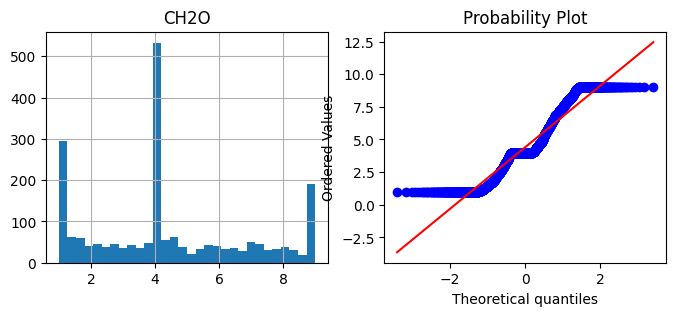

Advertencia: La columna 'FAF' contiene valores igual a 0. Saltando transformación polinomial para esta columna.
Advertencia: La columna 'TUE' contiene valores igual a 0. Saltando transformación polinomial para esta columna.


In [47]:
for col in cont:
    if col in proyecto_data_poli.columns:
        if (proyecto_data_poli[col] == 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores igual a 0. Saltando transformación polinomial para esta columna.")
            continue
        proyecto_data_poli[col] = (proyecto_data_poli[col]) ** 2
        plot_density_qq(proyecto_data_poli, col)
        plt.show()

- Transformacion Exponencial

In [48]:
proyecto_data_expo = proyecto_data_cap.copy()

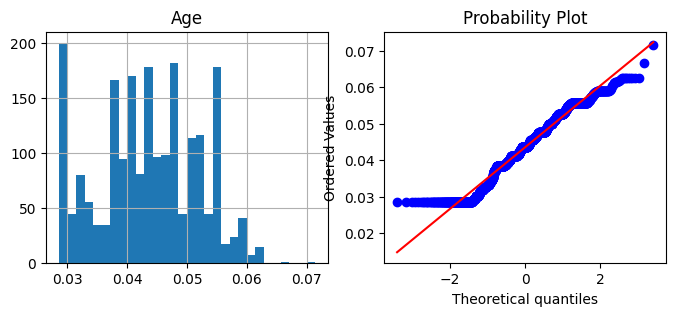

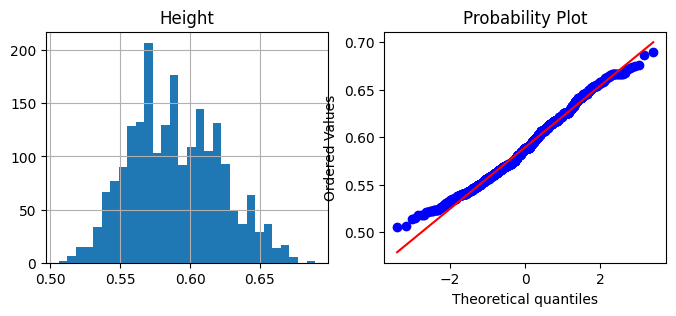

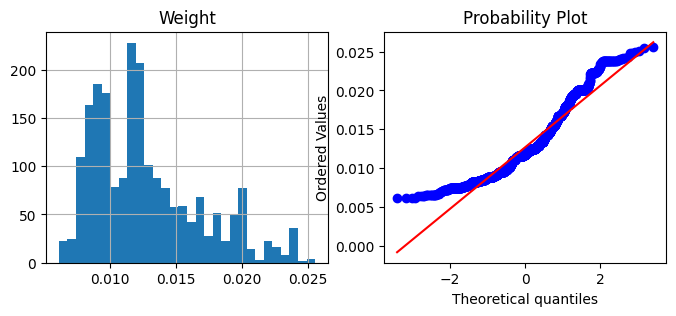

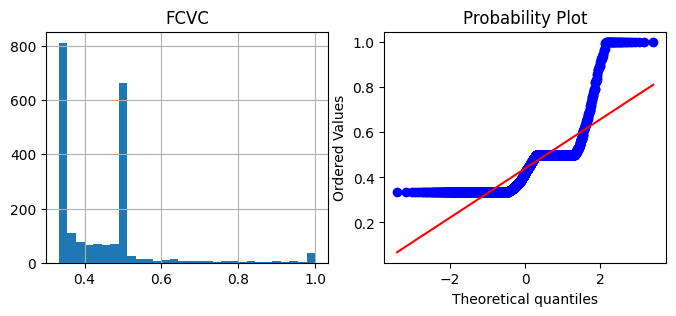

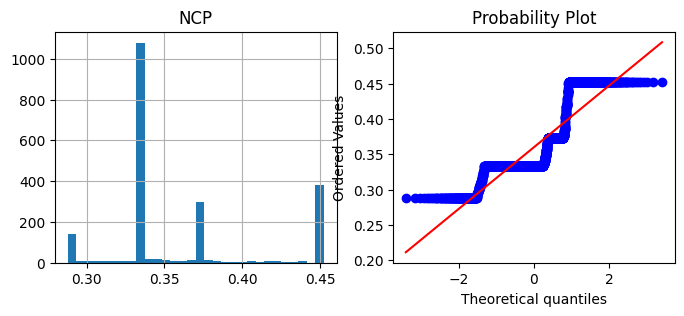

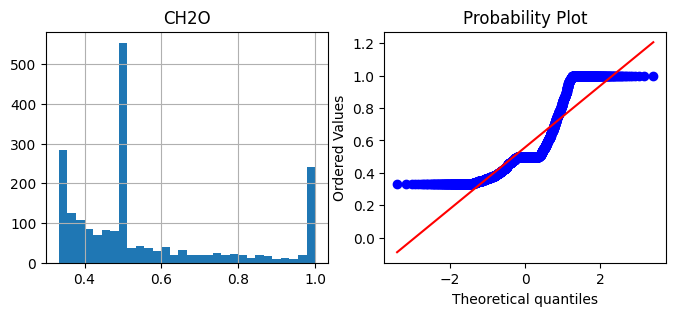

Advertencia: La columna 'FAF' contiene valores igual a 0. Saltando transformación inversa para esta columna.
Advertencia: La columna 'TUE' contiene valores igual a 0. Saltando transformación inversa para esta columna.


In [49]:
for col in cont:
    if col in proyecto_data_expo.columns:
        if (proyecto_data_expo[col] == 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores igual a 0. Saltando transformación inversa para esta columna.")
            continue
        proyecto_data_expo[col] = 1 / proyecto_data_expo[col]
        plot_density_qq(proyecto_data_expo, col)
        plt.show()

- Transformacion Box - Cox

In [50]:
proyecto_data_box = proyecto_data_cap.copy()

-1.0576


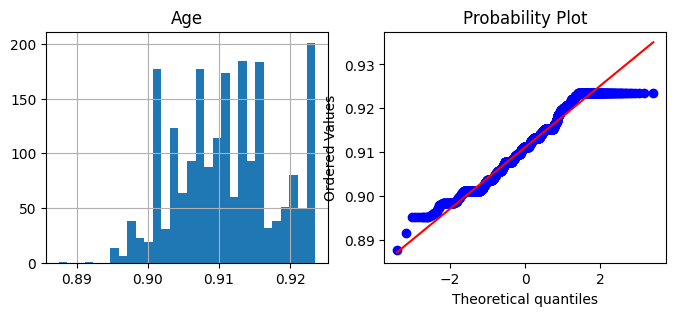

1.022


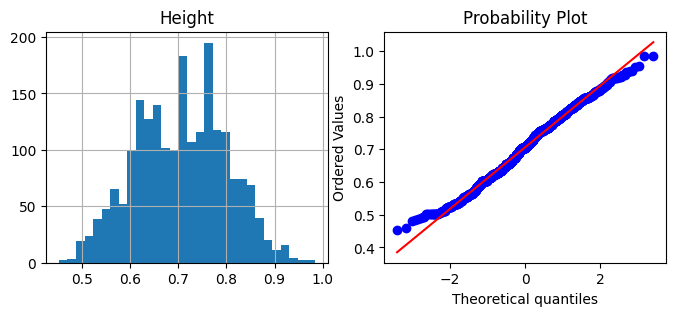

0.4697


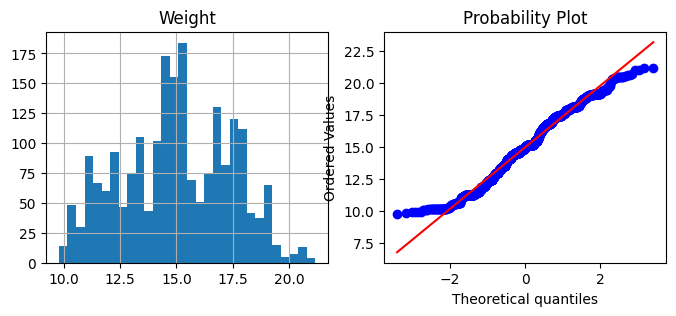

1.7177


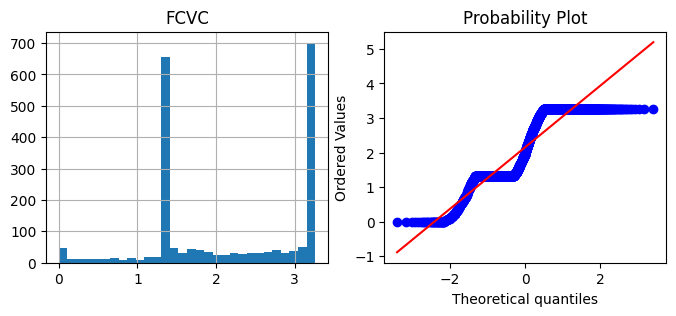

2.5796


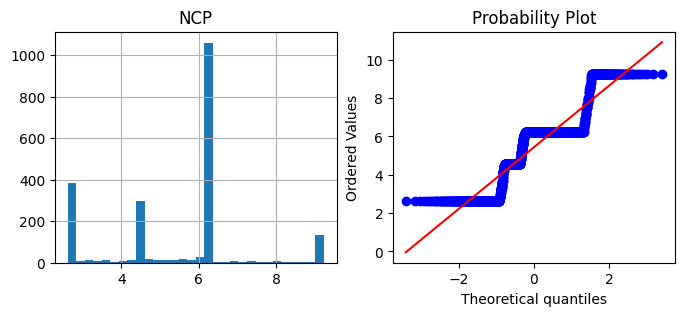

0.9923


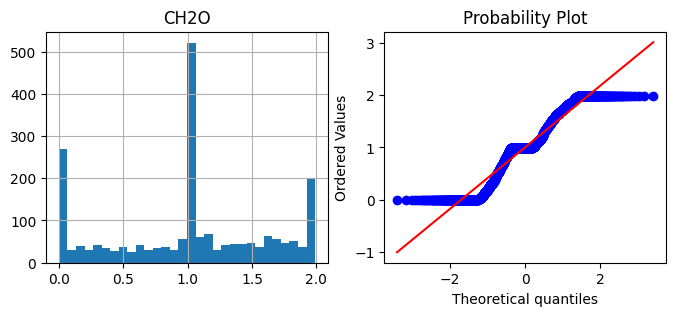

Advertencia: La columna 'FAF' contiene valores igual a 0. Saltando transformación box cox para esta columna.
Advertencia: La columna 'TUE' contiene valores igual a 0. Saltando transformación box cox para esta columna.


In [51]:
for col in cont:
    if col in proyecto_data_box.columns:
        if (proyecto_data_box[col] == 0).any():
            print(f"Advertencia: La columna '{col}' contiene valores igual a 0. Saltando transformación box cox para esta columna.")
            continue
        proyecto_data_box[col], lmbd= stats.boxcox(proyecto_data_box[col])
        lmbd = str(round(lmbd,4))
        print(lmbd)
        plot_density_qq(proyecto_data_box, col)
        plt.show()

Derivado del analisis de las transformaciones anteriores, la del metodo logaritmico es la mas adecuada.

In [52]:
proyecto_data_log.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,3.044522,283,0.482426,4.158883,639,238,0.693147,0.987476,2015,2067,0.693147,1726,1.003579,1.0,1765,1495,287
1,3.044522,912,0.418710,4.025352,1401,238,1.098612,1.098612,96,44,1.098612,1726,3.000000,0.0,1765,1495,287
2,3.135494,916,0.587787,4.343805,70,238,0.693147,1.098612,2015,2067,0.693147,1726,2.000000,1.0,1765,1495,287
3,3.295837,283,0.587787,4.465908,70,238,1.098612,0.987476,2015,2067,0.693147,385,1.003579,0.0,1765,55,290
4,3.091042,916,0.576613,4.497585,1401,238,0.693147,0.793502,2015,2067,0.693147,385,0.000000,0.0,1765,1495,290


In [61]:
proyecto_data_log.to_csv("../data/processed/features_for_model.csv", index=False)